In [0]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
import pickle
df = pd.read_csv(io.BytesIO(uploaded['data_clean.csv'])) #setup of the dataframe based on the cleaned data 
df.head()

Saving data_clean.csv to data_clean.csv


,Unnamed: 0,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_KD,B_avg_LEG_att,B_avg_LEG_landed,B_avg_PASS,B_avg_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_att,B_avg_TD_landed,B_avg_TD_pct,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_longest_win_streak,B_losses,B_avg_opp_BODY_att,...,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_opp_KD,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_opp_PASS,R_avg_opp_REV,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_SIG_STR_pct,R_avg_opp_SUB_ATT,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_opp_TD_pct,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_total_rounds_fought,R_total_time_fought(seconds),R_total_title_bouts,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,2.600000,2.000000,48.600000,11.200000,0.800000,7.6,5.400000,0.400000,0.000000,65.40,22.600000,0.466000,0.400000,0.80000,0.200000,0.100000,66.400000,23.600000,4.0,1.0,6.400000,...,13.300000,8.800000,7.500000,5.100000,90.500000,26.800000,0.800000,0.300000,76.100000,17.300000,0.100000,9.400000,6.100000,0.000000,0.000000,98.800000,32.200000,0.336000,0.000000,0.900000,0.100000,0.050000,110.500000,43.300000,27.0,742.60,3.0,0.0,2.0,4.0,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,3.0,0.0,14.600000,9.100000,11.800000,7.300000,124.700000,42.100000,2.400000,1.900000,112.000000,32.000000,0.000000,12.3,10.200000,0.800000,0.000000,138.90,51.300000,0.399000,0.700000,1.00000,0.500000,0.225000,158.700000,69.600000,3.0,6.0,13.000000,...,24.571429,14.142857,10.571429,7.857143,98.571429,32.571429,6.428571,4.285714,61.857143,12.428571,0.000000,29.142857,18.142857,1.142857,0.000000,115.571429,44.714286,0.437143,0.285714,3.285714,0.857143,0.147143,158.142857,82.285714,25.0,1062.00,2.0,0.0,1.0,2.0,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,5.516129,3.806452,67.645161,23.258065,0.645161,14.0,12.193548,0.935484,0.096774,97.00,46.774194,0.496129,0.354839,2.16129,0.677419,0.295484,103.709677,52.548387,8.0,8.0,17.903226,...,14.466667,8.133333,2.800000,0.733333,91.066667,32.200000,4.866667,2.800000,78.266667,23.200000,0.266667,6.000000,4.400000,0.333333,0.133333,98.733333,35.733333,0.340000,0.066667,2.866667,0.666667,0.131333,102.133333,38.600000,33.0,604.40,2.0,0.0,1.0,3.0,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,13.000000,10.500000,116.250000,53.750000,0.500000,3.0,2.500000,0.500000,0.250000,136.25,70.250000,0.550000,0.250000,2.50000,1.250000,0.287500,154.750000,86.750000,4.0,0.0,12.250000,...,20.250000,13.375000,6.875000,5.625000,103.125000,38.500000,0.875000,0.750000,77.375000,20.375000,0.125000,13.250000,11.125000,0.000000,0.000000,110.875000,44.875000,0.446250,0.000000,2.375000,0.000000,0.000000,115.125000,48.875000,20.0,690.25

# First Question: Which fighter, in absolute numbers, won the most fights in the whole timespan?

In [0]:
df_fighter = df[['R_fighter','B_fighter','Winner']] #filtering of the relevant columns from the original df
df_fighter = df_fighter[df_fighter.Winner != 'Draw'] #dropping all the rows that had no winner but the fight ended as a draw

df_fighter['Winner_count'] = 'default value'        #setup of a new column for counting the winners
for i in df_fighter.index:                          #for-loop to assign the name of the Winner to a new column based on the 'Winner'-column 
    if df_fighter.loc[i]['Winner']== 'Red':
      df_fighter.Winner_count[i] = df_fighter.R_fighter[i]
    if df_fighter.loc[i]['Winner']== 'Blue':
      df_fighter.Winner_count[i] = df_fighter.B_fighter[i]

print('The fighter that has the most wins is: ' + df_fighter.Winner_count.value_counts().idxmax() + ' and he has ' + str(df_fighter.Winner_count.value_counts().max()) + ' wins.') #counting how often each name occurs in the new column and printing the name as well as the number of occurences of the fighter with the maximum wins. 

The fighter that has the most wins is: Donald Cerrone and he has 23 wins.


# Second Question: How many fighters have no wins, just 1 win or multiple wins?

In [0]:
winner_list = df_fighter.Winner_count.value_counts().tolist() #creating a list containing all the names of the winners. This is an alternative method to the method of looping over a column of a df, which was used in question one. 
x = 0
y = 0
for i in range(len(winner_list)): #looping over the list of win counts and adding up the numbers of 1 wins and more than 1 win with an if-statement
  if winner_list[i] == 1:
    x += 1
  if winner_list[i] > 1:
    y += 1
print('There are ' + str(x) + ' people that have 1 win.') #printing the findings of the if-statement 
print('There are ' + str(y) + ' people that have more than 1 win.')

There are 382 people that have 1 win.
There are 885 people that have more than 1 win.


In [0]:
R_fighter = df_fighter.R_fighter.values.tolist() #creating a list that contains every red fighter
B_fighter = df_fighter.B_fighter.values.tolist() #creating a list that contains every blue fighter
fighters = [*R_fighter,*B_fighter] #concatenate the two lists to one
fighters = list(set(fighters)) #deleting possible duplicate names from the list by converting it to a set (which cannot contain duplicates) and converting it back to a list
z = 0
for i in range(len(fighters)): #looping over the list an adding 1 to a counter for each item in the list that is not in the winner_count - column and therefore participated in a fight but never won a fight
  if fighters[i] not in df_fighter.Winner_count.values:
    z += 1

print('There are ' + str(z) + ' people that have no wins.') #priting the findings of the if-statement

There are 641 people that have no wins.


# Third Question: What does the density - distribution of the height/weight-ratio look like? 

Text(0.5, 1.0, 'Distribution of the height-weight-ratio among the fighters')

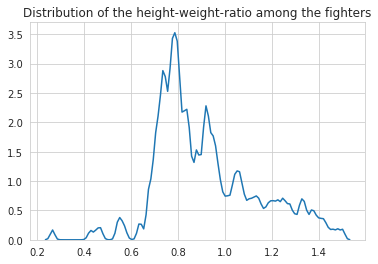

In [15]:
%matplotlib inline
df['R_ratio'] = df['R_Height_cms'] / df['R_Weight_lbs'] #creating two new columns containing the height to weight-ratio of the fighters 
df['B_ratio'] = df['B_Height_cms'] / df['B_Weight_lbs'] 
R_ratio = df.R_ratio.tolist() #creating a list of the weight-ratios of the red fighters
B_ratio = df.B_ratio.tolist() #creating a list of the weight-ratios of the blue fighters
ratio = [*R_ratio,*B_ratio] #concatenate the two lists to one
ratio=list(set(ratio)) #drop reaccuring values (if a fighter fought more than one fight)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(ratio), bw=0.01) #plotting the density distribution of the list 
plt.title('Distribution of the height-weight-ratio among the fighters')

# Fourth Question: What is the percentage of rounds won by KO or technical KO?

In [0]:
R_KO = df['R_win_by_KO/TKO'].sum() 
R_wins=df['R_wins'].sum()
B_KO = df['B_win_by_KO/TKO'].sum()
B_wins=df['B_wins'].sum()
KO_sum_perc = ((R_KO / R_wins) + (B_KO / B_wins))/2 #geometric mean of the percentage of rounds that were won by KO or technical KO
print('{percent:.0%}'.format(percent = KO_sum_perc) + ' of all fights are won by KO or technical KO.')

35% of all fights are won by KO or technical KO.


# Fifth Question: What is the maximum age a fighter has won a fight with?

In [20]:
import warnings
warnings.filterwarnings('ignore')
df_age = df[['R_fighter','B_fighter','B_age','R_age','Winner']] #filtering the relevant columns 
df_age = df_age[df_age.Winner != 'Draw'] #filtering out the fights that ended in a draw
df_age['Winner_count'] = 'default value'
for i in df_age.index: #looping over every row in the dataframe to get the age of the winner of each fight
    if df_age.loc[i]['Winner']== 'Red':
      df_age.Winner_count[i] = df_age.R_age[i]
    if df_age.loc[i]['Winner']== 'Blue':
      df_age.Winner_count[i] = df_age.B_age[i]

Winning_age = df_age[df_age.Winner_count == df_age.Winner_count.max()].reset_index() #if-statement to get the name of the oldest fighter that ever won a fight in the UFC-history.
if Winning_age.Winner[0] == 'Red':
  win = Winning_age.R_fighter[0]
if Winning_age.Winner[0] == 'Blue':
  win = Winning_age.B_fighter[0]  
df_age=df_age.sort_values('Winner_count', ascending=False)
print('The fighter that was the oldest when he won a fight is ' + win + ' at ' + str(int(df_age.Winner_count.max())) + ' years old.') #printing the findings of the for-loop and the if-statement stated above
df_age

The fighter that was the oldest when he won a fight is Randy Couture at 47 years old.


,R_fighter,B_fighter,B_age,R_age,Winner,Winner_count
3730,Randy Couture,James Toney,42.0,47.0,Red,47
3928,Randy Couture,Brandon Vera,32.0,46.0,Red,46
3865,Randy Couture,Mark Coleman,45.0,46.0,Red,46
1458,Dan Henderson,Hector Lombard,38.0,45.0,Red,45
1908,Tim Boetsch,Dan Henderson,44.0,34.0,Blue,44
...,...,...,...,...,...,...
5034,Vitor Belfort,Tra Telligman,32.0,19.0,Red,19
1757,Francisco Trevino,Sage Northcutt,19.0,33.0,Blue,19
1678,Sage Northcutt,Cody Pfister,25.0,19.0,Red,19
762,Song Yadong,Bharat Kandare,30.0,19.0,Red,19


# Implementation of a Machine Learning Model to predict the Winner of a fight 

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from  sklearn.metrics import *
df_model = df.drop(['R_fighter',	'B_fighter'	,'Referee',	'date',	'location','Unnamed: 0'],axis=1) #dropping irrelevant columns
df_model = pd.get_dummies(df_model, drop_first=True) #getting the dummie-values of the dataframe
#df_model.dropna()
X=df_model.drop('Winner_Red',axis=1) #splitting the dataframe into independent variable X and goal of prediction Y 
X[X==np.inf]=np.nan #cleaning the dataset of infinite values
X.fillna(X.mean(), inplace=True) #filling NaN-values with the means
Y=df_model.Winner_Red 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #split up the dataset into 80% train and 20% test

In [0]:
regr = RandomForestRegressor() #setting up the model
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred = regr.predict(X_test) #getting the metrics of the model to assess how good the model actually is
y_pred = np.around(y_pred, 0)
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.6997084548104956
0.8
0.906158357771261
0.7161066048667439


In [0]:
mean_squared_error(y_test, y_pred)

0.30029154518950435

In [0]:
pickle.dump(regr, open('RandomForestRegressor.model', 'wb')) #saving and reloading the model for further use
loaded_regr = pickle.load(open('RandomForestRegressor.model', 'rb'))